In [1]:
import numpy as np
import math
import re
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import string
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers


2024-01-19 13:20:39.499514: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 13:20:40.172507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-19 13:20:40.172622: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-19 13:20:40.283601: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-19 13:20:40.500328: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-19 13:20:43.534654: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [10]:
import os

os.getcwd()

'/home/alessandro/Documentos/academico/posGraduacaoXp/projetoAplicado/projeto/codigo/ambiente/0005_17012024'

In [2]:
#preprocessamento

In [3]:
dataSet = pd.read_csv('armazem/baseDados/baseDados.csv')
dataSet.columns

Index(['Unnamed: 0', 'headline ', 'texto_path', 'url', 'fonte',
       'grupo empresarial', 'local_fonte', 'autores', 'data',
       'polaridade_headline', 'polaridade_texto', 'vies_politico',
       'noticia com protgonismo naval GLO Marinha', 'alcance', 'fratricidio',
       'identificador'],
      dtype='object')

In [4]:
dataSet.drop(labels=['Unnamed: 0'],axis='columns',inplace=True)


In [5]:
dataSet.columns

Index(['headline ', 'texto_path', 'url', 'fonte', 'grupo empresarial',
       'local_fonte', 'autores', 'data', 'polaridade_headline',
       'polaridade_texto', 'vies_politico',
       'noticia com protgonismo naval GLO Marinha', 'alcance', 'fratricidio',
       'identificador'],
      dtype='object')

In [6]:
pathConteudo = 'armazem/baseDados/treinamento/'

In [7]:
dataSet

headline  texto_path  \
0   Operação da GLO não deve impactar comércio ext...              
1   Entenda como vai funcionar a GLO nos portos e ...              
2   Lula diz que ação das Forças Armadas vai tirar...              
3   Especialistas veem  com ceticismo GLO do gover...              
4   GLO: Marinha usa blindado levado ao Haiti e na...              
5   Presidente do Porto de Santos fala em “ação su...              
6   Lula diz que GLO no Rio e em SP é para 'defini...              
7   Comandante da Marinha defende GLO e diz que op...              
8   Governo Lula batiza operação no Rio de “GLO do...              
9   Lula diz que GLO no Rio e em SP é para 'defini...              
10  GLO de Lula é ineficaz, contraproducente e env...              
11  Militares da FAB vão pedir câmeras corporais p...              
12  FAB vai mobilizar 600 militares para reforço d...              
13  Presidente do porto de Santos diz que GLO será...              
14  GLO pode causar custos e atrasos na liberação ...              
15  Auditores da Receita temem que militares invad...              
16  Navio da marinha realiza patrulha no Porto de ...              
17   A Tribuna acompanha inspeção em operação da G...              
18  Militares contra o crime: por que agora daria ...              
19  Marinha e PF apreendem 2 toneladas de drogas e...              
20  Ações do governo federal podem melhorar a segu...              
21  Na 1ª reunião, comitê da GLO expõe divergência...              
22  GLO é pirotecnia que não freará o crime organi...              
23  GLO: almirante fala grosso em reunião de comit...              
24  Marinha aborda mais de 500 embarcações na prim...              
25     “GLO do Mar” completa uma semana de atividades              
26  Marinha apreendeu seis embarcações na primeira...              
27  Governo Lula tenta debelar nova disputa entre ...              
28  Marinha do Brasil divulga como funcionam os si...              
29  Marinha apresenta sistemas que monitoram o trá...              
30  Marinha apresenta estrutura usada em operações...              
31  Marinha usa lanchas blindadas e navio com metr...              
32  Marinha aborda 125 embarcações no porto de san...              
33  Reforço Vital na ‘GLO do Mar’ e Resgate Heroic...              
34  Receita Federal e Marinha do Brasil intensific...              
35  Receita Federal e Marinha realizam ação de com...              
36  Marinha, Receita e Polícia Federal apertam o c...              
37  Novos blindados dos EUA reforçam Marinha em GL...              
38  GLO de portos e aeroportos é um show sem eficá...              
39  Marinha realiza quase 5 mil procedimentos em o...              
40  Marinhas do Brasil e EUA impõem prejuízo bilio...              
41  Marinha recebe novas viaturas blindadas para o...              
42  GLO, péssima ideia, por Manuel Domingos Neto e...              
43  Garantia de Lei e da Ordem nos Portos Brasilei...              
44  Militares da Marinha atuam em apreensão de dro...              
45  Operação Navegação Segura da Polícia Civil com...              
46  Ministério da Justiça quer replicar modelo de ...              
47  Marinha do Brasil e Receita Federal Ampliam Vi...              
48  Marinha do Brasil e Receita Federal ampliam vi...              
49  Ação interagências resulta em nova apreensão d...              
50  Marinha realiza operação de combate a ilícitos...              
51  MJSP apresenta balanço da GLO nos aeroportos e...              
52  Governo Federal entrega 700 viaturas e repassa...              
53  Operação Conjunta no Porto de Santos Intercept...              
54  Marinha apoia Receita Federal em ação da “GLO ...              
55  Marinha realiza operação de combate a ilícitos...              

                                                  url  \
0   https://www.atribuna.com.br/noticias/portomar/...   
1   https://www.santaportal.com.br/ultimas-noticia...

<Axes: xlabel='count', ylabel='polaridade_texto'>

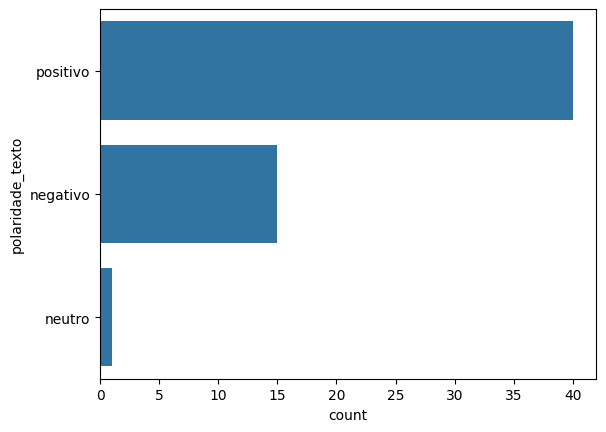

In [19]:
sns.countplot(dataSet.polaridade_texto)

In [8]:
dataSet['url'][0]

'https://www.atribuna.com.br/noticias/portomar/operacao-da-glo-nao-deve-impactar-comercio-exterior-no-porto-de-santos'

In [11]:
nomeArqConteudoScraping:list = os.listdir(path=pathConteudo)

In [12]:
nomeArqConteudoScraping[0]

'6.txt'

In [15]:
with open(f'{pathConteudo}{nomeArqConteudoScraping[0]}','r') as arq:
    texto = arq.read()
print(texto)

 O presidente Luiz Inácio Lula da Silva (PT) afirmou nesta terça-feira que a operação de Garantia da Lei e da Ordem (GLO) no Rio de Janeiro e em São Paulo é para "definitivamente tirar o poder do crime organizado". A operação anunciada na semana passada terá validade até o dia 3 de maio de 2024.  
Editorial: GLO de Lula é necessária, porém insuficienteFrota na GLO: Marinha usa blindado levado ao Haiti e navios-patrulha que participaram de ação na África 
 — Estamos combinados com os governadores, estamos combinados com a PF, Marinha, Aeronáutica, Exército, com a Força Nacional, com a PRF, vamos definitivamente tirar o poder da organização chamada crime organizado. Isso foi anunciado na semana passada, já está em funcionamento.  
 Anteriormente, no entanto, Lula já havia afirmado que não haveria GLO em seu governo. As Forças Armadas vão atuar nos portos e aeroportos em conjunto com a Polícia Federal. Exército e Aeronáutica também vão ampliar a atuação nas fronteiras, em conjunto com PF 

In [16]:
a='https://www.atribuna.com.br/noticias/portomar/operacao-da-glo-nao-deve-impactar-comercio-exterior-no-porto-de-santos'
valor =dataSet[dataSet['url']==a]
valor.identificador

0    1
Name: identificador, dtype: int64

In [18]:
valor.polaridade_texto

'0    positivo'

In [66]:
' gh sds '.strip()

'gh sds'

In [26]:
dataSet.loc[39].url

'https://www.cnnbrasil.com.br/nacional/marinha-realiza-quase-5-mil-procedimentos-em-operacao-glo-do-mar/'

In [27]:
dataSet.polaridade_texto.unique()

array(['positivo', 'negativo', 'neutro'], dtype=object)

In [28]:
dataSet.polaridade_headline.unique()

array(['positivo', 'neutro', 'negativo'], dtype=object)

In [39]:
os.listdir('armazem/baseDados/treinamento/')[0][-4:]

'.txt'

In [67]:
dataFrame_limpo = pd.DataFrame(columns=['texto','polaridade,identificador'])

In [64]:

def verificarSeArq(path='armazem/baseDados/treinamento/'):
    arquivos=[]
    for elem in os.listdir(path):
        if elem[-4:] ==".txt":
            arquivos.append(elem)
    return arquivos

In [45]:
def getConteudo(arq,modAb='r'):
    with open(arq,modAb) as arq:
        cont =arq.read()
    cont= "".join(cont)
    return cont

In [65]:
arquivos =verificarSeArq()
arquivos

['5_positivo.txt',
 '2_positivo.txt',
 '3_positivo.txt',
 '16_negativo.txt',
 '23_negativo.txt',
 '10_positivo.txt',
 '8_positivo.txt',
 '24_negativo.txt',
 '41_positivo.txt',
 '47_negativo.txt',
 '11_negativo.txt',
 '19_negativo.txt',
 '28_negativo.txt',
 '15_negativo.txt',
 '46_positivo.txt',
 '9_neutro.txt',
 '45_positivo.txt',
 '18_positivo.txt',
 '56_positivo.txt',
 '4_negativo.txt',
 '40_positivo.txt',
 '12_negativo.txt',
 '32_positivo.txt']

TypeError: 'list' object is not an iterator

In [29]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.85, stratify = y)

NameError: name 'X' is not defined